<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#loading dataset : iris
from sklearn.datasets import load_iris
data=load_iris()

In [206]:
#preparing x and y
x=pd.DataFrame(data['data'],columns=data['feature_names'])
y=pd.DataFrame(data['target'],columns=['Target_Class'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [207]:
y.Target_Class.value_counts()

2    50
1    50
0    50
Name: Target_Class, dtype: int64

In [208]:
#checking if null values are there
x.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [209]:
y.isna().any()

Target_Class    False
dtype: bool

In [210]:
x.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Target_Class  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


(None, None)

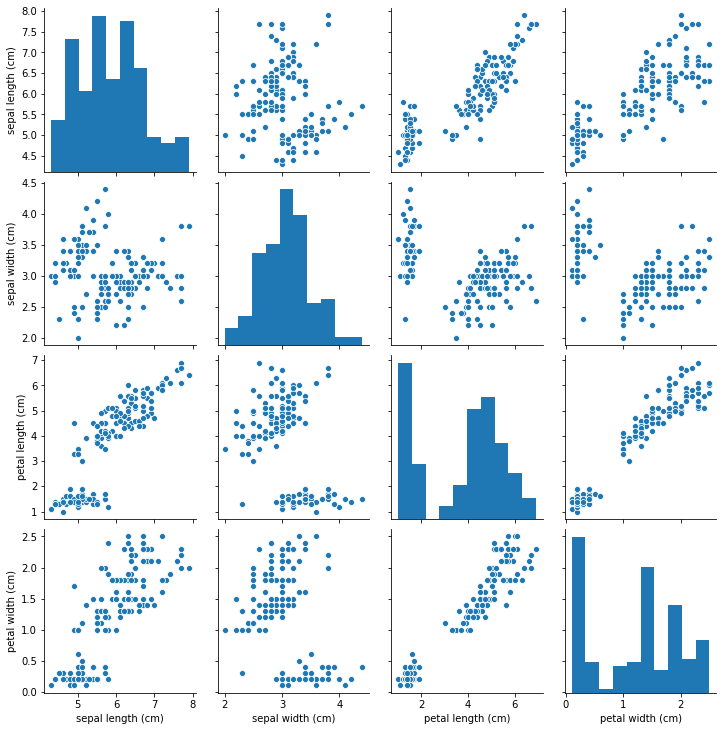

In [211]:
sns.pairplot(x)

#splitting the data for training and testing


In [0]:
from sklearn.model_selection import  train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.3)

# doing classification with decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc_gini=DecisionTreeClassifier(criterion='gini',random_state=42)      #using Gini Index
dtc_entropy=DecisionTreeClassifier(criterion='entropy',random_state=42,)#using Information Gain and Entropy

In [216]:
dtc_gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [217]:
dtc_entropy.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred1=dtc_gini.predict(x_test)

In [0]:
y_pred2=dtc_entropy.predict(x_test)

# Evaluation of models

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [221]:
print(f'using Gini Impurity : {accuracy_score(y_pred1,y_test)}\n using Information Gain and Entropy : {accuracy_score(y_pred2,y_test)}')

using Gini Impurity : 0.9333333333333333
 using Information Gain and Entropy : 0.8888888888888888


Text(0.5, 1.0, '\nusing Gini Impurity\n')

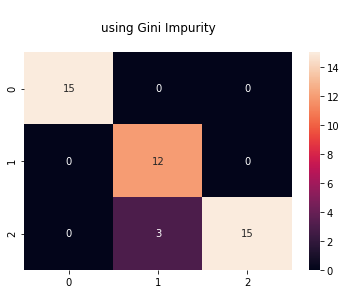

In [222]:
sns.heatmap(confusion_matrix(y_pred1,y_test),annot=True,fmt='.0f')
plt.title('\nusing Gini Impurity\n')

Text(0.5, 1.0, '\nusing information Gain\n')

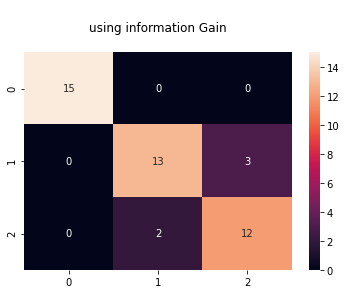

In [223]:
sns.heatmap(confusion_matrix(y_pred2,y_test),annot=True,fmt='.0f')
plt.title('\nusing information Gain\n')

# doing cross Validation with max_depth


In [224]:
from sklearn.model_selection import cross_val_score

depth_scores=[]
depth_range=list(range(3,21))

for i in depth_range:

  dtc=DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=42)
  scores=cross_val_score(dtc,x_train,y_train,cv=10,n_jobs=-1)

  #depth_scores.append((i,scores.mean()))
  depth_scores.append(scores.mean())

print(depth_scores)


[0.9518181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819, 0.9318181818181819]


Text(0.5, 1.0, 'Determining depth for Decision Tree')

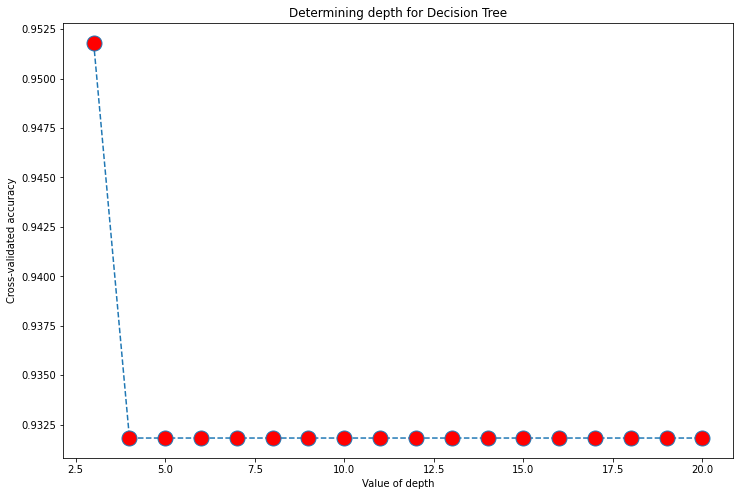

In [225]:
plt.figure(figsize=(12,8))
plt.plot(depth_range,depth_scores,marker='o',markerfacecolor='red', markersize=15,linestyle='dashed')
plt.xlabel('Value of depth')
plt.ylabel('Cross-validated accuracy')
plt.title('Determining depth for Decision Tree')

In [0]:
#thus at max-depth 6, we have achieved the highest accuracy
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=6)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

Text(0.5, 1.0, '\nusing Gini Impurity\n')

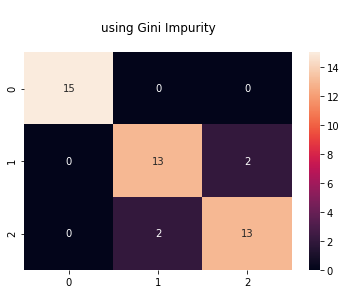

In [227]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f')
plt.title('\nusing Gini Impurity\n')

In [228]:
accuracy_score(y_pred,y_test)

0.9111111111111111

## doing Grid Search to tuning the parameters

In [0]:
from sklearn.model_selection import GridSearchCV as gsc

In [240]:
# parameter grids
parameter_grid = {'criterion':['gini','entropy'],
                  'max_depth': range(3,9),
                  'max_features': [1, 2, 3, 4],
                  'max_leaf_nodes': range(2, 12), 
                  'min_samples_split': range(1, 12)
                  }

dtc=DecisionTreeClassifier(random_state=42)

#use gridsearch to test all values for n_neighbors
dtc_gscv = gsc(dtc, parameter_grid, cv=5,scoring='accuracy',n_jobs=-1)

#fit model to data
dtc_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [241]:
dtc_gscv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [242]:
dtc_gscv.best_index_

122

In [243]:
dtc_gscv.best_score_,dtc_gscv.best_params_

(0.9619047619047618,
 {'criterion': 'gini',
  'max_depth': 3,
  'max_features': 2,
  'max_leaf_nodes': 3,
  'min_samples_split': 2})

In [0]:
y_pred=dtc_gscv.predict(x_test)

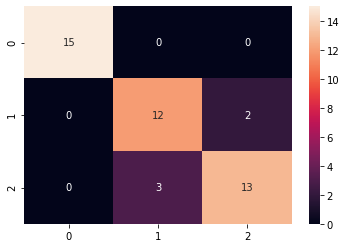

In [245]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f')

In [246]:
accuracy_score(y_pred,y_test)

0.8888888888888888

In [239]:
!pip install graphviz

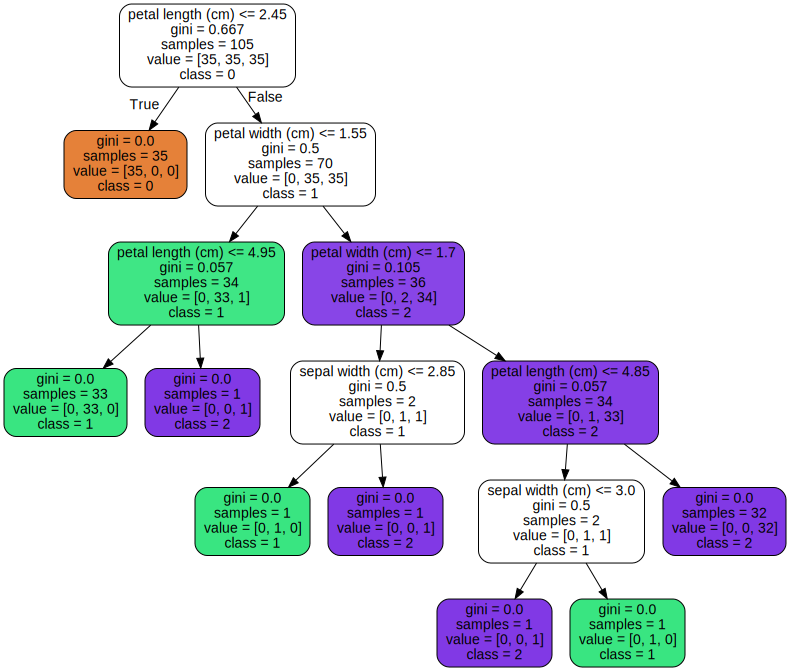

In [192]:
#plotting : decision tree on giny based
from sklearn.tree import export_graphviz
import graphviz

feature_names = x.columns

dot_data = export_graphviz(dtc_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=['0','1','2'])
graph = graphviz.Source(dot_data)  
graph

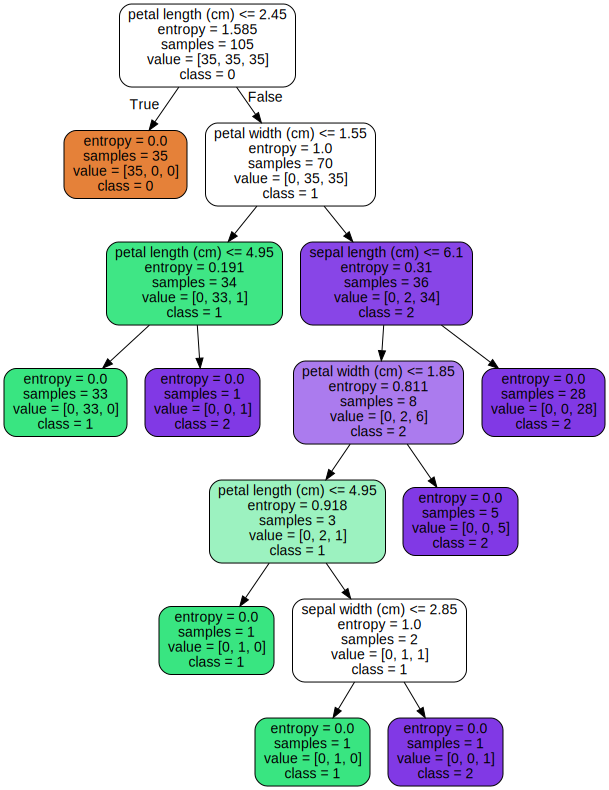

In [193]:
#plotting : decision tree on information/entropy  based
from sklearn.tree import export_graphviz
import graphviz

feature_names = x.columns

dot_data = export_graphviz(dtc_entropy, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=['0','1','2'])
graph = graphviz.Source(dot_data)  
graph

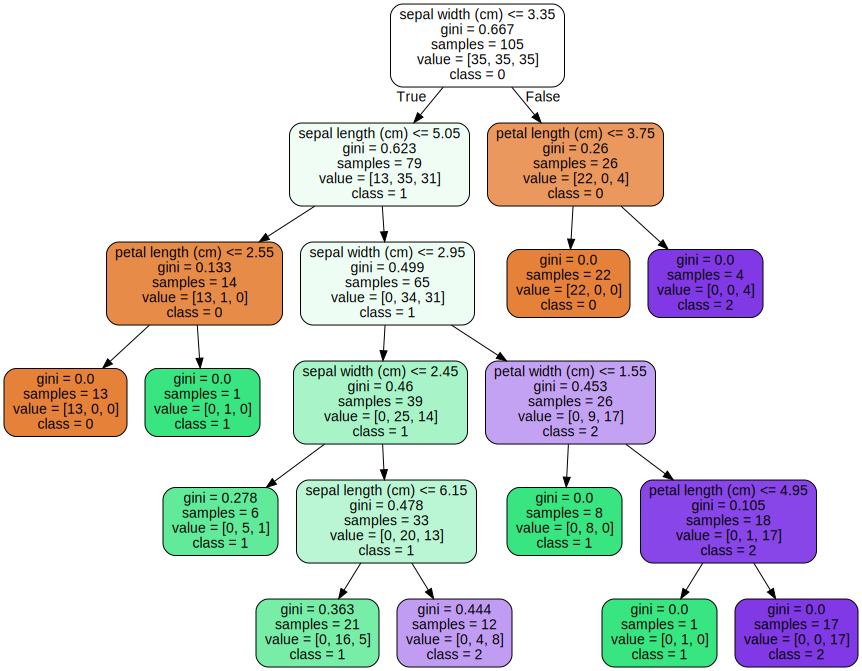

In [234]:
#plotting : decision tree with GRIDSEARCHCV (dtc_gscv)  on information/entropy  based
from sklearn.tree import export_graphviz
import graphviz

feature_names = x.columns

dot_data = export_graphviz(dtc_gscv.best_estimator_, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=['0','1','2'])
graph = graphviz.Source(dot_data)  
graph

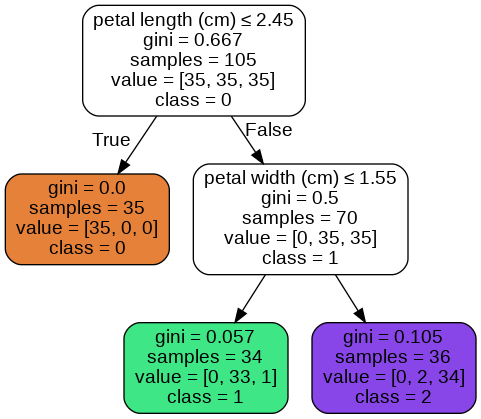

In [247]:
#Another way
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_names = x.columns
dot_data = StringIO()

export_graphviz(dtc_gscv.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1','2'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [198]:
dot_data = tree.export_graphviz(dtc_gscv, out_file='tree.dot')  
graph = pydotplus.graph_from_dot_data(dot_data)  `
Image(graph.create_png())

SyntaxError: ignored

## Decison Tree
----------------------------------------

1. Course : [Free Course on Analytics Vidya](https://courses.analyticsvidhya.com/courses/take/getting-started-with-decision-trees/lessons/8157457-how-to-select-the-best-split-point-in-decision-trees),[another-2](https://courses.analyticsvidhya.com/courses/take/a-comprehensive-learning-path-to-become-a-data-scientist-in-2020/texts/9775059-decision-tree-algorithm),[course-3](https://www.python-course.eu/Decision_Trees.php)


Regression

https://intellipaat.com/blog/decision-tree-algorithm-in-machine-learning/

https://heartbeat.fritz.ai/implementing-regression-using-a-decision-tree-and-scikit-learn-ac98552b43d7

https://lethalbrains.com/learn-ml-algorithms-by-coding-decision-trees-439ac503c9a4


https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1


Both
https://stackabuse.com/decision-trees-in-python-with-scikit-learn/


https://medium.com/@penggongting/implementing-decision-tree-from-scratch-in-python-c732e7c69aea

Youtube
https://www.youtube.com/watch?v=eKD5gxPPeY0

https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/


with Grid Search
https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489

https://stackoverflow.com/q/35097003/12210002

https://medium.com/@haydar_ai/learning-data-science-day-22-cross-validation-and-parameter-tuning-b14bcbc6b012

https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

Pruning
===============
https://www.softwaretestinghelp.com/decision-tree-algorithm-examples-data-mining/